<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/4%EC%A3%BC%EC%B0%A8/4%EC%A3%BC%EC%B0%A8_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EB%94%AE%EB%9F%AC%EB%8B%9D_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/breast_cancer.csv')

X = df.drop(columns = ['label'])
y = df['label']

from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y).values
#X = X.values
#GPT : 스케일링 과정에서 X에 .values가 붙는다. 따라서 다시 붙일 이유가 없다.

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [10]:
X.shape

(569, 31)

In [11]:
Y.shape

(569, 2)

In [12]:
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

In [14]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7859 - loss: 0.4877 - val_accuracy: 0.9890 - val_loss: 0.2106
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9480 - loss: 0.2036 - val_accuracy: 1.0000 - val_loss: 0.1142
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9683 - loss: 0.1416 - val_accuracy: 1.0000 - val_loss: 0.0799
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9570 - loss: 0.1510 - val_accuracy: 1.0000 - val_loss: 0.0630
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9631 - loss: 0.0974 - val_accuracy: 1.0000 - val_loss: 0.0515
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9899 - loss: 0.0579 - val_accuracy: 1.0000 - val_loss: 0.0474
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9763 - loss: 0.0749 - val_accuracy: 1.0000 - val_loss: 0.0437
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9820 - loss: 0.0600 - val_accuracy: 1.0000 - val_loss

In [15]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [16]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [18]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [19]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

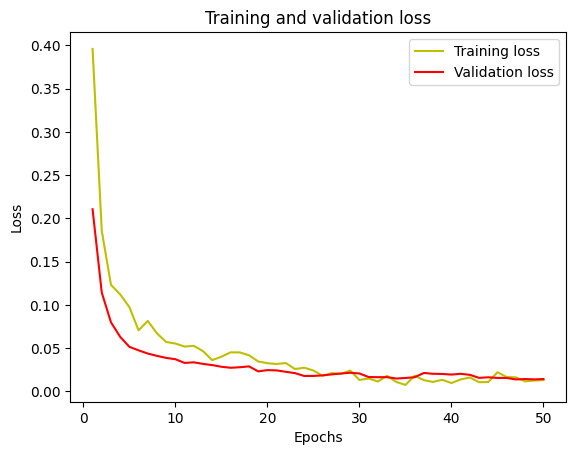

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

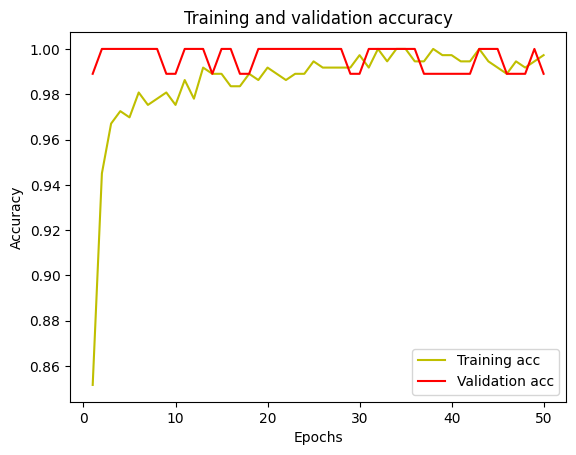

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        47
           1       0.98      0.96      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

[[46  1]
 [ 3 64]]
